## ❤ 모듈, 학습 과정 정리

1. 얼굴이 포함된 사진을 준비하고
2. 사진으로부터 얼굴 영역 face landmark 를 찾아냅니다. (landmark를 찾기 위해서는 얼굴의 bounding box를 먼저 찾아야합니다.)
3. 찾아진 영역으로 부터 코에 수염 스티커를 붙여넣겠습니다.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


## 🧡 이미지 가져오기

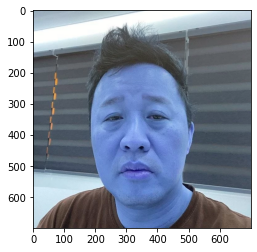

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/정준하.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)# 이미지 시각화
plt.show()

 ## 💚 이미지 rgb변환
 - cv는 bgr값을 사용하므로 이것을 rgb로 바꿔주는 과정이 필요하다. 

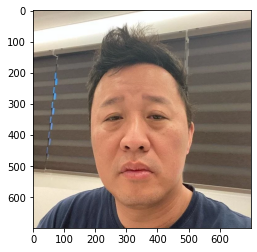

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 💛 얼굴 위치 찾기

- dlib.get_frontal_face_detector() 를 이용해 얼굴 위치 좌표를 추출 합니다.


In [4]:
# HOG detector를 선언합니다 -> 얼굴을 찾아주는 함수
detector_hog = dlib.get_frontal_face_detector()

# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print(dlib_rects) 

rectangles[[(170, 277) (491, 598)]]


## 💙 위에서 찾은 좌표를 이용해 얼굴 영역에 사각형 박스를 그려줍니다.

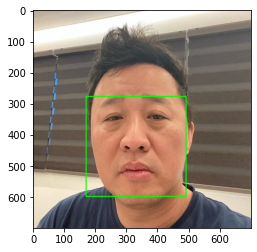

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
# 순서대로 왼,위,오,아래의 좌표를 가져오면 cv2.rectangle을 이용해서 사각형 박스를 그립니다.
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # 복사한 이미지에다 사각형을 그립니다.
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 💜 얼굴 박스 안에 이목구비 위치 찾기
- face landmark 기술을 이용해 이목구비를 찾아 점을 찍는다.

In [6]:
# 모델 가져오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

- 잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.

In [7]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)# 이미지에서 얼굴형태의 점 좌표를 추출
    # print(points.parts())
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))# 추출한 좌표를 리스트 형태로 변환
    list_landmarks.append(list_points)

print(f'랜드마크 좌표 : {list_landmarks}')

랜드마크 좌표 : [[(183, 360), (185, 403), (192, 446), (201, 488), (211, 530), (229, 570), (258, 600), (293, 621), (337, 627), (382, 620), (422, 598), (454, 567), (476, 529), (488, 485), (494, 441), (499, 396), (501, 351), (205, 319), (217, 292), (242, 279), (272, 276), (300, 284), (349, 283), (377, 274), (407, 273), (434, 284), (450, 308), (325, 334), (325, 363), (324, 391), (324, 421), (292, 449), (308, 453), (325, 457), (344, 453), (361, 447), (236, 353), (251, 344), (267, 342), (285, 350), (268, 354), (251, 356), (371, 347), (387, 338), (404, 338), (420, 346), (405, 351), (387, 351), (278, 524), (292, 501), (309, 489), (324, 494), (341, 489), (363, 499), (383, 520), (365, 533), (345, 538), (328, 539), (312, 538), (295, 533), (289, 521), (310, 509), (325, 511), (342, 508), (374, 518), (343, 517), (327, 519), (312, 516)]]


- 68개의 좌표를 점으로 표시합니다.

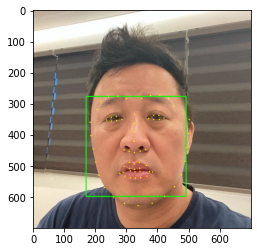

In [8]:
# 점좌표를 가져와서 이미지에 점을 찍씁니다.
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 🤍 스티커 적용하기

- 스티커 위치 지정 -> 스티커 이미지를 시각화 해보면 왼쪽위가 0,0 인걸 알수있음. 그래서 스티커 이미지의 기준좌표는 왼위가됨
- 스티커 크기 지정 -> 여기선 얼굴 박스 너비를 기준으로 정사각형을 만듬
- 주의 ❗ 이미지 위치를 지정할때 이미지 크기를 고려해서 얼굴 이미지의 크기를 벗어나지 않게 해줘야함!!
- 얼굴 이미지를 벗어날시 스티커 이미지를 자르게 되는데 이때 스티커 이미지와 스티커 공간의 크기가 달라져서 문제가 됨.

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (f'얼굴의 중심점 : {landmark[30]}') # 코의 index는 30 입니다 -> 얼굴의 중심
    w = h = dlib_rect.width()
    x = landmark[30][0] - w//2
    y = landmark[30][1]- dlib_rect.height()//2 # 스티커 위치를 올리는 구간인데 여기서 올리지않으면 사진 사이즈를 벗어나서 오류가 뜸 
   
    print (f'스티커 기준점 위치 (x,y) :{(x,y)}') # 스티커 위치 좌표 
    print ('스티커 크기 (w,h) : {(w,h)}')

얼굴의 중심점 : (324, 421)
스티커 기준점 위치 (x,y) :(163, 260)
스티커 크기 (w,h) : {(w,h)}


## 🧡 스티커 이미지 불러오기
- 왼위가 (0,0)
- 사이즈는 얼굴박스 너비의 반

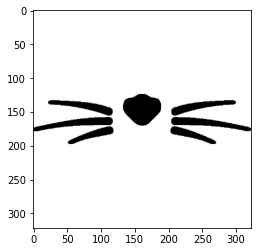

In [10]:
# 스티커 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 사이즈 변환
plt.imshow(img_sticker)

In [11]:
# 스티커가 들어갈 위치 정하기 ,,, 위에서 한번에 해줬으므로 변수명만 변경함.
refined_x = x #- w//2
refined_y = y 
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (163,260)


## 💜 스티커 이미지 좌표가 음수인경우 -> 얼굴 이미지 사이즈를 벗어남.
- 음수는 무슨 의미일까요?
- 스티커의 시작점이 얼굴 사진의 영역을 벗어나면 음수로 표현됩니다. 그런데 opencv 데이터는 numpy ndarray 형태의 데이터를 사용합니다. ndarray는 음수 인덱스에 접근할 수 없기 때문에 음수에 대한 예외 처리를 해줘야 합니다
- 스티커가 원본 이미지의 범위를 넘어가는 경우는 하나 더 있습니다. 바로 스티커의 시작점 + 스티커 사진의 크기가 원본 이미지의 크기보다 큰 경우입니다.

In [12]:
# 좌표값이 음수이면 범위를 벗어나므로 잘라줌
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:] # 음수로 인해 이미지영역을 벗어나는 부분을 자르고 저장
    refined_x = 0 # 
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # 좌표값이 같다 == 잘린게 없다.

(x,y) : (163,260)


## 🤎 스티커가 들어갈 공간 지정
- 얼굴 이미지에 스티커 공간 지정
- 얼굴 이미지에 스티커 공간 부분을 스티커 이미지로 대체

- 이해하기 난해 할 수 있음 
    - ❗리스트를 변수로 주는 부분이 이해하기 힘들긴한데 우리가 결국 출력할 것은 얼굴 이미지 이기때문에 얼굴 이미지에 변경을 해야하므로 sticker_area를 변수로 주면 안되고 얼굴 이미지에서 스티커 공간과 같은 부분을 변수로 지정 해야함. 

In [13]:
# 스티커가 들어갈 공간 크기 지정
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 얼굴 이미지에서 스티커 공간을 스티커 이미지로 대체
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

## 🖤 얼굴 이미지에 스티커 붙이기 

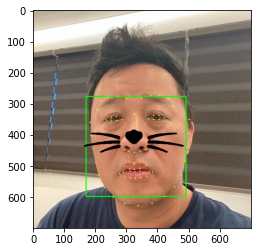

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 💔 원본이미지에 수염을 투명화 해서 삽입

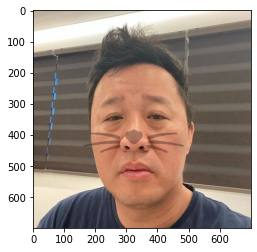

In [15]:
# 스티커가 들어갈 공간 크기 지정
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 투명화
dst = cv2.addWeighted(sticker_area,0.7,img_sticker,0.3,0)

#  스티커의 뒷 배경을 얼굴 이미지로 대체
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,dst).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 💝 다른이미지에 적용해보기(여러얼굴, 차은우,뷔, 얼굴모양 기와)
- 각도, 밝기, 거리등에 대해 이목구비를 어떻게 찾고, 스티컥 어떻게 적용되는지 확인해보자

## 💘 이미지 합성 과정을 함수로 만들어보자!

In [16]:
# 이미지 합성 함수화
def image_habsung(image_path):
    my_image_path = image_path
    img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
    print('원본')
    plt.imshow(img_bgr)# 이미지 시각화
    plt.show()
    print('-'*100)
    # plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print('RGB변경')
    plt.imshow(img_rgb)
    plt.show()
    print('-'*100)
    # HOG detector를 선언합니다 -> 얼굴을 찾아주는 함수
    detector_hog = dlib.get_frontal_face_detector()
    # detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
    # 찾은 얼굴 영역 박스 리스트
    # 여러 얼굴이 있을 수 있습니다
    # 순서대로 왼,위,오,아래의 좌표를 가져오면 cv2.rectangle을 이용해서 사각형 박스를 그립니다.
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        # 복사한 이미지에다 사각형을 그립니다.
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    print(f'얼굴 박스') 
    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    print('-'*100)
    # 모델 가져오기
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)# 이미지에서 얼굴형태의 점 좌표를 추출
        # print(points.parts())
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))# 추출한 좌표를 리스트 형태로 변환
        list_landmarks.append(list_points)
    # 점좌표를 가져와서 이미지에 점을 찍씁니다.
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
    print('이목구비 점 표시')
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    print('-'*100)
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print('얼굴의 중심')
        print (landmark[30]) # 코의 index는 30 입니다 -> 얼굴의 중심
        w = h = dlib_rect.width()
        x = landmark[30][0] - w//2
        y = landmark[30][1]- dlib_rect.height()//2 # 스티커 위치를 올리는 구간인데 여기서 올리지않으면 사진 사이즈를 벗어나서 오류가 뜸 
        print('스티커 기준점과, 스티커 크기')
        print ('(x,y) : (%d,%d)'%(x,y)) # 스티커 위치 좌표 
        print ('(w,h) : (%d,%d)'%(w,h))
        print('-'*100)
        # 스티커 불러오기
        sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
        img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
        img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 사이즈 변환
        # 스티커가 들어갈 위치 정하기
        refined_x = x #- w//2
        refined_y = y 
        print ('스티커가 들어갈 위치(x,y) : (%d,%d)'%(refined_x, refined_y))
        # 좌표값이 음수이면 범위를 벗어나므로 잘라줌
        if refined_x < 0: 
            img_sticker = img_sticker[:, -refined_x:] # 음수로 인해 이미지영역을 벗어나는 부분을 자르고 저장
            refined_x = 0 # 
        if refined_y < 0:
            img_sticker = img_sticker[-refined_y:, :]
            refined_y = 0
        print ('영역을 벗어난 부분 자른 후 (벗어났다면 사이즈가 달라짐)(x,y) : (%d,%d)'%(refined_x, refined_y))
        print('-'*100)
        # 스티커가 들어갈 공간 크기 지정
        sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
        # 얼굴 이미지에서 스티커 공간을 스티커 이미지로 대체
        img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
            np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
        # 스티커가 들어갈 공간 크기 지정
        sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
        # 투명화
        dst = cv2.addWeighted(sticker_area,0.5,img_sticker,0.5,0)
        #  스티커의 뒷 배경을 얼굴 이미지로 대체
        img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
            np.where(img_sticker!=0,sticker_area,dst).astype(np.uint8)
    print ('스티커')
    plt.imshow(img_sticker)
    plt.show()
    print('-'*100)
    print('스티커 삽입')
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()
    print('-'*100)
    print('원본 이미지에 적용 및 투명화')
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()
    print('-'*100)

## 📌여러명의 얼굴을 넣으면 어떻게 될까?


원본


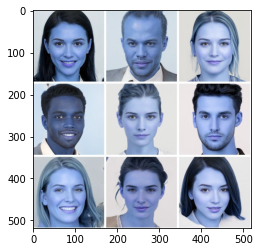

----------------------------------------------------------------------------------------------------
RGB변경


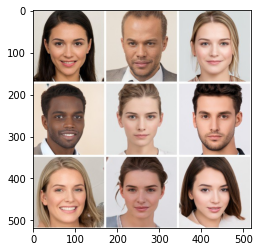

----------------------------------------------------------------------------------------------------
얼굴 박스


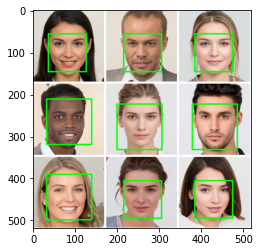

----------------------------------------------------------------------------------------------------
이목구비 점 표시


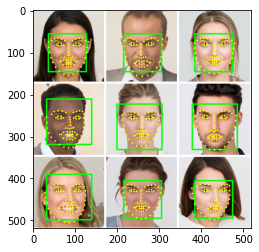

----------------------------------------------------------------------------------------------------
얼굴의 중심
(431, 105)
스티커 기준점과, 스티커 크기
(x,y) : (386,60)
(w,h) : (91,91)
----------------------------------------------------------------------------------------------------
스티커가 들어갈 위치(x,y) : (386,60)
영역을 벗어난 부분 자른 후 (벗어났다면 사이즈가 달라짐)(x,y) : (386,60)
----------------------------------------------------------------------------------------------------
얼굴의 중심
(430, 281)
스티커 기준점과, 스티커 크기
(x,y) : (376,227)
(w,h) : (108,108)
----------------------------------------------------------------------------------------------------
스티커가 들어갈 위치(x,y) : (376,227)
영역을 벗어난 부분 자른 후 (벗어났다면 사이즈가 달라짐)(x,y) : (376,227)
----------------------------------------------------------------------------------------------------
얼굴의 중심
(91, 451)
스티커 기준점과, 스티커 크기
(x,y) : (37,397)
(w,h) : (108,108)
----------------------------------------------------------------------------------------------------
스티커가 들어갈 위치(x,y) : (37,397)
영역

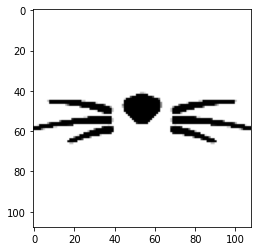

----------------------------------------------------------------------------------------------------
스티커 삽입


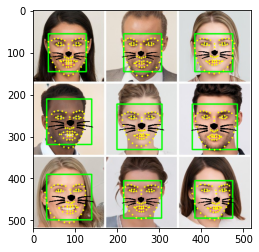

----------------------------------------------------------------------------------------------------
원본 이미지에 적용 및 투명화


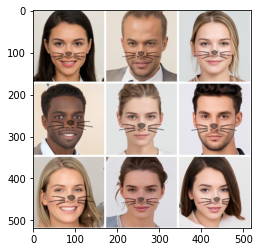

----------------------------------------------------------------------------------------------------


In [17]:
# 여러 명의 얼굴
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/얼굴들.png'
image_habsung(image_path)

## 📌각도가 다른 사진을 넣으면 어떻게 될까?


원본


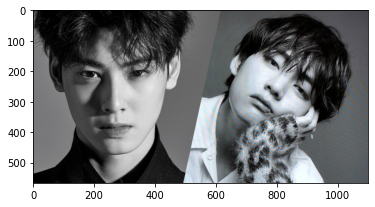

----------------------------------------------------------------------------------------------------
RGB변경


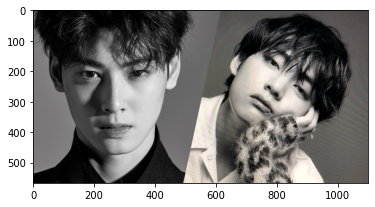

----------------------------------------------------------------------------------------------------
얼굴 박스


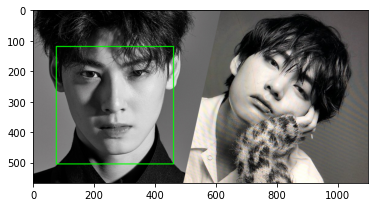

----------------------------------------------------------------------------------------------------
이목구비 점 표시


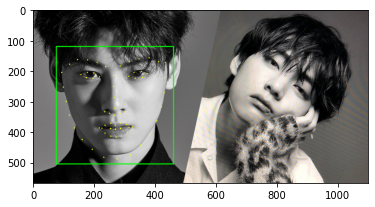

----------------------------------------------------------------------------------------------------
얼굴의 중심
(268, 321)
스티커 기준점과, 스티커 크기
(x,y) : (75,128)
(w,h) : (386,386)
----------------------------------------------------------------------------------------------------
스티커가 들어갈 위치(x,y) : (75,128)
영역을 벗어난 부분 자른 후 (벗어났다면 사이즈가 달라짐)(x,y) : (75,128)
----------------------------------------------------------------------------------------------------
스티커


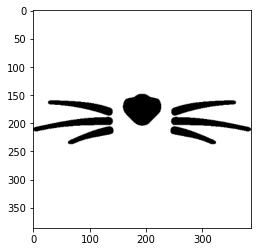

----------------------------------------------------------------------------------------------------
스티커 삽입


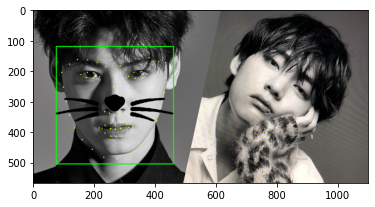

----------------------------------------------------------------------------------------------------
원본 이미지에 적용 및 투명화


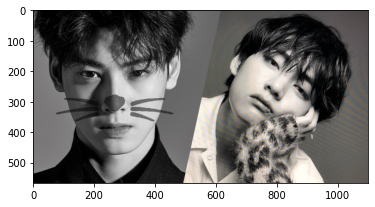

----------------------------------------------------------------------------------------------------


In [18]:
# 각도가 다른 얼굴
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/차뷔.png'
image_habsung(image_path)

## 📌얼굴모양 기와를 넣으면 어떻게 될까?

원본


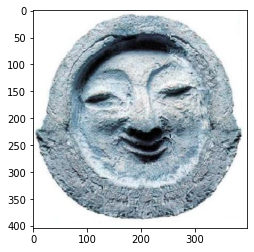

----------------------------------------------------------------------------------------------------
RGB변경


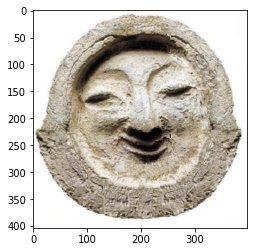

----------------------------------------------------------------------------------------------------
얼굴 박스


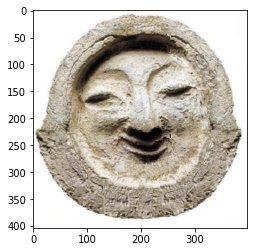

----------------------------------------------------------------------------------------------------
이목구비 점 표시


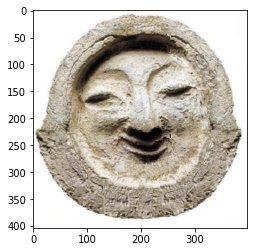

----------------------------------------------------------------------------------------------------
스티커


UnboundLocalError: local variable 'img_sticker' referenced before assignment

In [19]:
# 얼굴모양 기와
image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/기와.png'
image_habsung(image_path)

## 💖 회고

### 1. 과정
- 처음엔 정준하님의 이미지를 가지고 이미지를 합성하는 과정을 익혀 보았고 
- 그 과정을 함수화 하였고
- 여러명의 얼굴 이미지,  각도가 다른 이미지,  얼굴모양을한 기와에 대해 적용시켜보았다.

### 2. 결과
- 얼굴 이미지가 똑바르다면 여러명의 얼굴에서도 합성이 잘되었다.
- 각도가 많이 틀어진 얼굴의 경우 랜드마크를 찍지 못하는것으로 나타났다.
- 얼굴모양을 한 기와의 경우 모델에서 얼굴이 아니다라고 판단 했는지 랜드마크가 찍히지 않았고 그로 인해 오류가 떳다.

### 3. 애로사항

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # 얼굴 이미지에서 스티커 공간을 스티커 이미지로 대체
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
       
- 위 코드를 해석하는 과정에서  2번째 리스트 변수가 sticker_area와 같은 형태라 변수를 sticker_area로 대체 했는데 스티커 이미지가 출력 되지 않았다.

### 4. 해결방법
- 우리가 출력 하고자 하는것은 img_show라는 전체 이미지인데 변수를 수정하면서 sticker_area에만 스티커가 적용되는 불상사가 발생했다. 
- 말로 설명하긴 어려우나 이해완료!
